In [15]:
import pandas as pd
import seaborn as sns


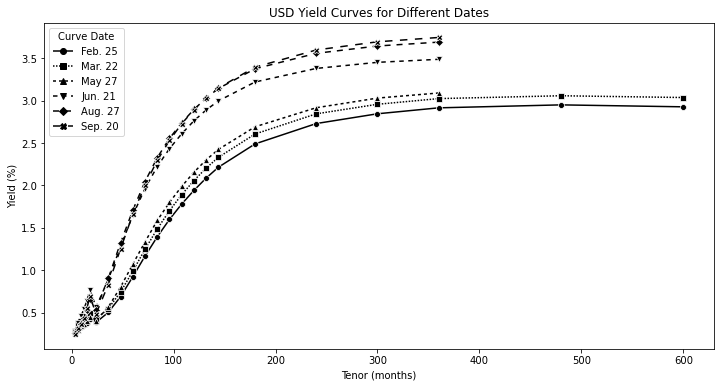

In [17]:
def read_curve(file_path, curve_date):
    curve_df = pd.read_excel(file_path)
    curve_df['curve_date'] = curve_date
    return curve_df

# Read the data from the xlsx files
curve_1 = read_curve('../data/raw/curves/USD/usd_02252013.xlsx', 'Feb. 25')
curve_2 = read_curve('../data/raw/curves/USD/usd_03222013.xlsx', 'Mar. 22')
curve_3 = read_curve('../data/raw/curves/USD/usd_05272013.xlsx', 'May 27')
curve_4 = read_curve('../data/raw/curves/USD/usd_06212013.xlsx', 'Jun. 21')
curve_5 = read_curve('../data/raw/curves/USD/usd_08272013.xlsx', 'Aug. 27')
curve_6 = read_curve('../data/raw/curves/USD/usd_09202013.xlsx', 'Sep. 20')

# Combine the DataFrames
yield_df = pd.concat([curve_1, curve_2, curve_3, curve_4, curve_5, curve_6], ignore_index=True)

# Convert Tenor to numeric for plotting
yield_df['Tenor_numeric'] = yield_df['Tenor'].str.extract('(\d+)').astype(float)
yield_df.loc[yield_df['Tenor'].str.contains('Y'), 'Tenor_numeric'] *= 12

plt.figure(figsize=(12, 6))
sns.lineplot(x='Tenor_numeric', y='Yield', hue='curve_date', data=yield_df, palette=['black']*6, 
             style='curve_date', markers=['o', 's', '^', 'v', 'D', 'X'], dashes=[(1, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)])
plt.xlabel('Tenor (months)')
plt.ylabel('Yield (%)')
plt.title('USD Yield Curves for Different Dates')
plt.legend(title='Curve Date')
plt.show()